## Importing Required Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import scipy.stats as st
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [28]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\emotions.csv")

In [29]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0


## Exploratory Data Analysis

### Missing Values

In [30]:
df.isnull().sum()

text     0
label    0
dtype: int64

### Duplicates

In [31]:
df.duplicated().sum()

1

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

0 - Sad
1 - Joy
2 - Love
3 - Anger
4 - Fear
5 - Surprise

In [34]:
df['label'] = df['label'].map({0:'Sad',1:'Joy',2:'Love',3:'Anger',4:'Fear',5:'Surprise'})

In [35]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,Sad
1,i dont know i feel so lost,Sad
2,i was beginning to feel quite disheartened,Sad
3,i can still lose the weight without feeling de...,Sad
4,im feeling a little like a damaged tree and th...,Sad
...,...,...
11995,i feel weird using his first name but the alte...,Surprise
11996,i read them i feel pleasantly surprised that t...,Surprise
11997,i feel a strange sense of guilt about it all,Surprise
11998,i let people know how i m actually feeling and...,Surprise


## Distribution

<Axes: >

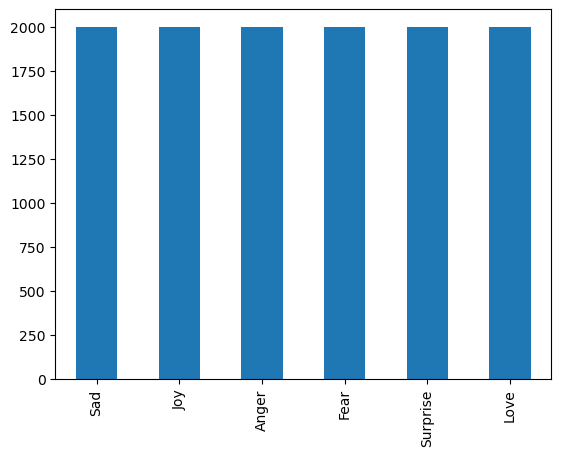

In [36]:
df['label'].value_counts().plot(kind='bar')

## Splitting the Data

In [37]:
X=df['text']
y=df['label']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [39]:
X_train

4920     i cant go but i feel i should be there support...
7748                           i see how she feels wronged
10648    i don t know how sasha fierce feels i m defini...
1355     i feel dull and numb most of the time i rarely...
10816                                i feel strange lately
                               ...                        
5249     i knows the score with how i feel about gb and...
10386                                i feel really strange
3473     i feel it is important to do some handwriting ...
8536     i ended up getting nice deals on everything i ...
899      i was feeling tragic and mikey was no cassanov...
Name: text, Length: 9599, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [42]:
pipe=Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [43]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [45]:
y_pred = pipe.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.8504166666666667

### Creating a pickle file

In [47]:
import pickle

In [48]:
pickle.dump(pipe,open("estimator.pkl","wb"))

In [49]:
import os

In [50]:
os.getcwd()

'C:\\Users\\ASUS\\Documents\\Innomatics Jupyter notebooks\\Machine Learning\\Snake'

In [51]:
predict = pickle.load(open("estimator.pkl","rb"))

In [52]:
predict.predict(['I am feeling lonely'])[0]

'Sad'